<a href="https://colab.research.google.com/github/SureshNaidu24/python/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##install the modules
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
import streamlit as st


In [ ]:
##Load data set
data=pd.read_csv("/content/Heart_Disease_Dataset.csv")
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,Yes,14.96,Yes,Yes,No,7.0,6.0,Yes,Female,25-29,White,Yes,Yes,Fair,17.1,Yes,Yes,Yes
1,Yes,36.93,Yes,Yes,No,3.0,10.0,No,Female,30-34,Hispanic,"No, borderline diabetes",Yes,Poor,2.7,Yes,No,No
2,No,18.70,Yes,No,Yes,26.0,15.0,No,Male,70-74,Hispanic,No,No,Poor,15.6,Yes,Yes,Yes
3,Yes,31.43,Yes,Yes,Yes,24.0,20.0,No,Female,40-44,American Indian/Alaskan Native,"No, borderline diabetes",No,Fair,1.4,No,No,Yes
4,Yes,75.64,No,No,Yes,2.0,29.0,No,Male,35-39,White,No,Yes,Excellent,8.8,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45856,No,81.40,Yes,No,Yes,13.0,22.0,Yes,Male,65-69,Black,"No, borderline diabetes",No,Very good,17.4,No,No,Yes
45857,Yes,65.25,Yes,No,Yes,4.0,27.0,No,Female,40-44,Other,No,No,Excellent,22.8,Yes,No,No
45858,Yes,91.45,No,No,No,4.0,5.0,No,Female,30-34,Hispanic,"No, borderline diabetes",No,Fair,9.3,Yes,Yes,No
45859,No,21.13,No,Yes,No,2.0,14.0,Yes,Male,50-54,Black,Yes (during pregnancy),No,Poor,7.6,Yes,No,Yes


In [ ]:
##bottom rows
data.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
45856,No,81.40,Yes,No,Yes,13.0,22.0,Yes,Male,65-69,Black,"No, borderline diabetes",No,Very good,17.4,No,No,Yes
45857,Yes,65.25,Yes,No,Yes,4.0,27.0,No,Female,40-44,Other,No,No,Excellent,22.8,Yes,No,No
45858,Yes,91.45,No,No,No,4.0,5.0,No,Female,30-34,Hispanic,"No, borderline diabetes",No,Fair,9.3,Yes,Yes,No
45859,No,21.13,No,Yes,No,2.0,14.0,Yes,Male,50-54,Black,Yes (during pregnancy),No,Poor,7.6,Yes,No,Yes
45860,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45861 entries, 0 to 45860
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      45861 non-null  object 
 1   BMI               45860 non-null  float64
 2   Smoking           45860 non-null  object 
 3   AlcoholDrinking   45860 non-null  object 
 4   Stroke            45860 non-null  object 
 5   PhysicalHealth    45860 non-null  float64
 6   MentalHealth      45860 non-null  float64
 7   DiffWalking       45860 non-null  object 
 8   Sex               45860 non-null  object 
 9   AgeCategory       45860 non-null  object 
 10  Race              45860 non-null  object 
 11  Diabetic          45860 non-null  object 
 12  PhysicalActivity  45860 non-null  object 
 13  GenHealth         45860 non-null  object 
 14  SleepTime         45860 non-null  float64
 15  Asthma            45860 non-null  object 
 16  KidneyDisease     45860 non-null  object

In [ ]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,45860.000000,45860.000000,45860.000000,45860.000000
mean,53.479953,14.499564,14.483362,12.476884
std,23.903408,8.633932,8.637860,6.634755
min,12.020000,0.000000,0.000000,1.000000
25%,32.890000,7.000000,7.000000,6.700000
50%,53.530000,14.000000,14.000000,12.500000
75%,74.110000,22.000000,22.000000,18.200000
max,94.850000,29.000000,29.000000,24.000000


In [ ]:
## check the null value
data.isnull().sum()

,0
HeartDisease,0
BMI,1
Smoking,1
AlcoholDrinking,1
Stroke,1
PhysicalHealth,1
MentalHealth,1
DiffWalking,1
Sex,1
AgeCategory,1


In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
45856,False
45857,False
45858,False
45859,False


In [ ]:
len(data[data.duplicated()])

0

In [ ]:
##
for column in data.columns:
  print(data[column].value_counts())

HeartDisease
No     22961
Yes    22900
Name: count, dtype: int64
BMI
71.52    17
21.30    17
17.45    16
70.43    15
43.32    15
         ..
33.77     1
66.61     1
34.39     1
45.58     1
56.25     1
Name: count, Length: 8259, dtype: int64
Smoking
Yes    23086
No     22774
Name: count, dtype: int64
AlcoholDrinking
Yes    23035
No     22825
Name: count, dtype: int64
Stroke
Yes    23098
No     22762
Name: count, dtype: int64
PhysicalHealth
8.0     1628
16.0    1620
14.0    1592
2.0     1574
12.0    1559
24.0    1557
29.0    1553
26.0    1548
6.0     1546
23.0    1545
9.0     1544
13.0    1544
15.0    1537
18.0    1528
3.0     1524
11.0    1521
19.0    1519
0.0     1516
20.0    1514
1.0     1511
7.0     1506
21.0    1503
27.0    1501
28.0    1499
10.0    1496
25.0    1489
17.0    1488
22.0    1487
5.0     1473
4.0     1438
Name: count, dtype: int64
MentalHealth
8.0     1589
16.0    1578
5.0     1573
22.0    1571
3.0     1571
18.0    1565
13.0    1559
26.0    1553
9.0     1546
21.0    154

In [ ]:
data['Diabetic'].value_counts()

,count
Diabetic,
Yes (during pregnancy),11585
No,11453
Yes,11415
"No, borderline diabetes",11407


In [ ]:
data=pd.get_dummies(data,columns=['Diabetic'],drop_first=True)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,Yes,14.96,Yes,Yes,No,7.0,6.0,Yes,Female,25-29,White,Yes,Fair,17.1,Yes,Yes,Yes,False,True,False
1,Yes,36.93,Yes,Yes,No,3.0,10.0,No,Female,30-34,Hispanic,Yes,Poor,2.7,Yes,No,No,True,False,False
2,No,18.70,Yes,No,Yes,26.0,15.0,No,Male,70-74,Hispanic,No,Poor,15.6,Yes,Yes,Yes,False,False,False
3,Yes,31.43,Yes,Yes,Yes,24.0,20.0,No,Female,40-44,American Indian/Alaskan Native,No,Fair,1.4,No,No,Yes,True,False,False
4,Yes,75.64,No,No,Yes,2.0,29.0,No,Male,35-39,White,Yes,Excellent,8.8,Yes,Yes,Yes,False,False,False


In [ ]:
##convert binary categorical variables into numerical columns
binary_columns=["Smoking","AlcoholDrinking","Stroke","DiffWalking",'PhysicalActivity',"Asthma",'KidneyDisease', 'SkinCancer']
for col in binary_columns:
    data[col]=data[col].map({'Yes':1,"No":0})

In [ ]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,Yes,14.96,1.0,1.0,0.0,7.0,6.0,1.0,Female,25-29,White,1.0,Fair,17.1,1.0,1.0,1.0,False,True,False
1,Yes,36.93,1.0,1.0,0.0,3.0,10.0,0.0,Female,30-34,Hispanic,1.0,Poor,2.7,1.0,0.0,0.0,True,False,False
2,No,18.70,1.0,0.0,1.0,26.0,15.0,0.0,Male,70-74,Hispanic,0.0,Poor,15.6,1.0,1.0,1.0,False,False,False
3,Yes,31.43,1.0,1.0,1.0,24.0,20.0,0.0,Female,40-44,American Indian/Alaskan Native,0.0,Fair,1.4,0.0,0.0,1.0,True,False,False
4,Yes,75.64,0.0,0.0,1.0,2.0,29.0,0.0,Male,35-39,White,1.0,Excellent,8.8,1.0,1.0,1.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45856,No,81.40,1.0,0.0,1.0,13.0,22.0,1.0,Male,65-69,Black,0.0,Very good,17.4,0.0,0.0,1.0,True,False,False
45857,Yes,65.25,1.0,0.0,1.0,4.0,27.0,0.0,Female,40-44,Other,0.0,Excellent,22.8,1.0,0.0,0.0,False,False,False
45858,Yes,91.45,0.0,0.0,0.0,4.0,5.0,0.0,Female,30-34,Hispanic,0.0,Fair,9.3,1.0,1.0,0.0,True,False,False
45859,No,21.13,0.0,1.0,0.0,2.0,14.0,1.0,Male,50-54,Black,0.0,Poor,7.6,1.0,0.0,1.0,False,False,True


In [ ]:
data=pd.get_dummies(data,columns=['Sex',"AgeCategory","Race","GenHealth"],drop_first=True)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,Yes,14.96,1.0,1.0,0.0,7.0,6.0,1.0,1.0,17.1,...,False,False,False,False,False,True,True,False,False,False
1,Yes,36.93,1.0,1.0,0.0,3.0,10.0,0.0,1.0,2.7,...,False,False,False,True,False,False,False,False,True,False
2,No,18.70,1.0,0.0,1.0,26.0,15.0,0.0,0.0,15.6,...,False,False,False,True,False,False,False,False,True,False
3,Yes,31.43,1.0,1.0,1.0,24.0,20.0,0.0,0.0,1.4,...,False,False,False,False,False,False,True,False,False,False
4,Yes,75.64,0.0,0.0,1.0,2.0,29.0,0.0,1.0,8.8,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
data.isnull().sum()

,0
HeartDisease,0
BMI,1
Smoking,1
AlcoholDrinking,1
Stroke,1
PhysicalHealth,1
MentalHealth,1
DiffWalking,1
PhysicalActivity,1
SleepTime,1


In [ ]:
#X,target
X=data.drop(columns=['HeartDisease'],axis=1)
y=data['HeartDisease'].map({'Yes':1,"No":0})

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
clf=DecisionTreeClassifier(max_depth=5,criterion="gini",random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
##make the predicition
y_pred=clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_score=roc_auc_score(y_test,y_pred)


Accuracy: 0.50
Precision: 0.50
Recall: 0.45
F1-Score: 0.47
AUC-ROC: 0.50


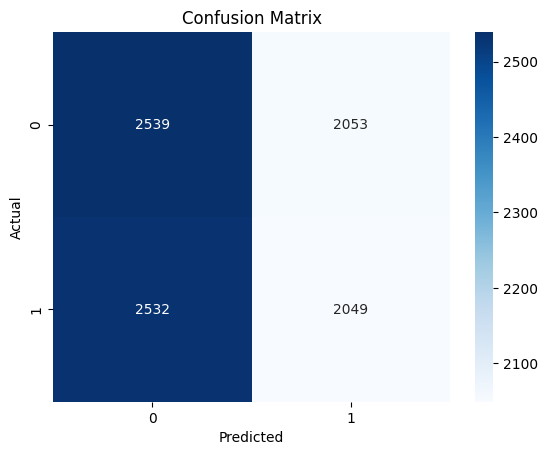

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [1]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.1 MB/s eta 0:00:00


In [4]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load and preprocess the dataset
data = pd.read_csv('/content/Heart_Disease_Dataset.csv')  # Replace with your actual dataset path

# Preprocessing steps
binary_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
for col in binary_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# One-hot encode categorical columns
data = pd.get_dummies(data, columns=['Sex', 'AgeCategory', 'Race', 'GenHealth', 'Diabetic'], drop_first=True)

# Define features and target
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease'].map({'Yes': 1, 'No': 0})

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Function to make predictions
def predict_heart_disease(input_data):
    # Create a DataFrame with the input data
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Ensure all columns are present (fill missing columns with 0)
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0

    # Reorder columns to match the model's expectations
    input_df = input_df[X.columns]

    # Make prediction
    prediction = clf.predict(input_df)
    return "Yes" if prediction[0] == 1 else "No"

# Streamlit app
st.title("Heart Disease Prediction")

# Input fields
bmi = st.number_input("BMI", min_value=0.0, max_value=100.0, value=25.0)
smoking = st.selectbox("Smoking", [0, 1])
alcohol_drinking = st.selectbox("Alcohol Drinking", [0, 1])
stroke = st.selectbox("Stroke", [0, 1])
physical_health = st.number_input("Physical Health (Days Not Good in Past 30)", min_value=0, max_value=30, value=0)
mental_health = st.number_input("Mental Health (Days Not Good in Past 30)", min_value=0, max_value=30, value=0)
diff_walking = st.selectbox("Difficulty Walking", [0, 1])
sex = st.selectbox("Sex", ["Female", "Male"])
age_category = st.selectbox("Age Category", ["25-29", "30-34", "35-39", "40-44", "50-54", "70-74"])
race = st.selectbox("Race", ["White", "Hispanic", "Black", "Asian", "American Indian/Alaskan Native"])
diabetic = st.selectbox("Diabetic Status", ["No", "No, borderline diabetes", "Yes (during pregnancy)", "Yes"])
physical_activity = st.selectbox("Physical Activity", [0, 1])
gen_health = st.selectbox("General Health", ["Poor", "Fair", "Good", "Very Good", "Excellent"])
sleep_time = st.number_input("Sleep Time (Hours)", min_value=0, max_value=24, value=7)
asthma = st.selectbox("Asthma", [0, 1])
kidney_disease = st.selectbox("Kidney Disease", [0, 1])
skin_cancer = st.selectbox("Skin Cancer", [0, 1])

# Prepare input data
input_data = {
    'BMI': bmi,
    'Smoking': smoking,
    'AlcoholDrinking': alcohol_drinking,
    'Stroke': stroke,
    'PhysicalHealth': physical_health,
    'MentalHealth': mental_health,
    'DiffWalking': diff_walking,
    'Sex_Male': 1 if sex == "Male" else 0,
    'AgeCategory_30-34': 1 if age_category == "30-34" else 0,
    'AgeCategory_35-39': 1 if age_category == "35-39" else 0,
    'AgeCategory_40-44': 1 if age_category == "40-44" else 0,
    'AgeCategory_50-54': 1 if age_category == "50-54" else 0,
    'AgeCategory_70-74': 1 if age_category == "70-74" else 0,
    'Race_Hispanic': 1 if race == "Hispanic" else 0,
    'Race_Black': 1 if race == "Black" else 0,
    'Race_Asian': 1 if race == "Asian" else 0,
    'Race_American Indian/Alaskan Native': 1 if race == "American Indian/Alaskan Native" else 0,
    'Diabetic_No, borderline diabetes': 1 if diabetic == "No, borderline diabetes" else 0,
    'Diabetic_Yes (during pregnancy)': 1 if diabetic == "Yes (during pregnancy)" else 0,
    'Diabetic_Yes': 1 if diabetic == "Yes" else 0,
    'PhysicalActivity': physical_activity,
    'GenHealth_Fair': 1 if gen_health == "Fair" else 0,
    'GenHealth_Good': 1 if gen_health == "Good" else 0,
    'GenHealth_Very Good': 1 if gen_health == "Very Good" else 0,
    'GenHealth_Excellent': 1 if gen_health == "Excellent" else 0,
    'SleepTime': sleep_time,
    'Asthma': asthma,
    'KidneyDisease': kidney_disease,
    'SkinCancer': skin_cancer
}

# Predict button
if st.button("Predict"):
    result = predict_heart_disease(input_data)
    st.write(f"Heart Disease Prediction: {result}")


Overwriting app.py


In [5]:
! wget -q -O - ipv4.icanhazip.com
 ##for getting the code

34.139.206.74


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.139.206.74:8501

y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙your url is: https://forty-dots-lie.loca.lt
